In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

class HyperParams:
    pass
hyperparams = HyperParams()

hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 120
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0010_1000"
MODEL_NAME = "0010_1000-64-aeconnect-xxe4"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0299
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.4778

from tensorflow.keras.optimizers import Adam
hyperparams.OPTIMIZER = Adam(0.0005,beta_1=0.9)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelD as train
import ReportsK as reports
import AEConnectionsF as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 64, 64, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   18496       leaky_re_lu[0][0]                
______________________________________________________________________________________________

{'name': 'Adam',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
            dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
            dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/
Noisy files:20137
Nitid files:20137
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/validation/
Noisy files:4872
Nitid files:4872


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

checkpoint_filepath = os.path.abspath(os.path.join('../../../saves/') + MODEL_NAME \
                                      + "_checkpoint_" + '_weights_{epoch:02d}-{val_loss:.2f}')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 50, \
                 callbacks=[model_checkpoint_callback] )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/120
630/630 [==============================] - 24s 30ms/step - loss: 0.0697 - val_loss: 0.0557
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-aeconnect-xxe4_checkpoint__weights_01-0.06\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/120
630/630 [==============================] - 20s 31ms/step - loss: 0.0611 - val_loss: 0.0600
Epoch 3/120
630/630 [==============================] - 19s 30ms/step - loss: 0.0589 - val_loss: 0.0533
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-aeconnect-xxe4_checkpoint__weights_03-0.05\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0574 - val_loss: 0.0511
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-aeconnect-xxe4_checkpoint__weights_04-0.05\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0557 - val_loss: 0.0539
Epoch 6/120
630/630 [==============================] - 17s 26ms/step - loss: 0.0550 - val_loss: 0.0523
Epoch 7/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0541 - val_loss: 0.0493
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-aeconnect-xxe4_checkpoint__weights_07-0.05\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 8/120
630/630 [==============================] - 17s 26ms/step - loss: 0.0533 - val_loss: 0.0486
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-aeconnect-xxe4_checkpoint__weights_08-0.05\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 9/120
630/630 [==============================] - 17s 26ms/step - loss: 0.0526 - val_loss: 0.0501
Epoch 10/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0516 - val_loss: 0.0487
Epoch 11/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0509 - val_loss: 0.0483
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-aeconnect-xxe4_checkpoint__weights_11-0.05\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 12/120
630/630 [==============================] - 17s 26ms/step - loss: 0.0504 - val_loss: 0.0494
Epoch 13/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0496 - val_loss: 0.0476
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-aeconnect-xxe4_checkpoint__weights_13-0.05\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 14/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0492 - val_loss: 0.0479
Epoch 15/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0481 - val_loss: 0.0468
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-aeconnect-xxe4_checkpoint__weights_15-0.05\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 16/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0472 - val_loss: 0.0471
Epoch 17/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0466 - val_loss: 0.0462
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-aeconnect-xxe4_checkpoint__weights_17-0.05\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 18/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0457 - val_loss: 0.0468
Epoch 19/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0450 - val_loss: 0.0472
Epoch 20/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0445 - val_loss: 0.0474
Epoch 21/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0432 - val_loss: 0.0500
Epoch 22/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0425 - val_loss: 0.0474
Epoch 23/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0417 - val_loss: 0.0475
Epoch 24/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0406 - val_loss: 0.0477
Epoch 25/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0399 - val_loss: 0.0495
Epoch 26/120
630/630 [==============================] - 16s 26ms/step - loss: 0.0390 - val_loss: 0.0478
Epoch 27/120
630/630 [==============================] - 16s 26ms

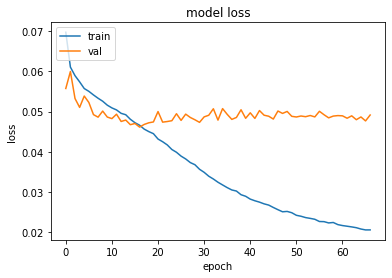

Best Epoch:17


In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Black image found
Black image found
Images count =4872
Best RMSENZ  =4401 (0.90)
Best MAENZ   =4416 (0.91)
Best PSNR    =4401 (0.90)
Best Accuracy=4189 (0.86)
RMSE-NZ  Pred=0.0538  Noisy=0.1609
MAE-NZ   Pred=0.0462  Noisy=0.1527
PSNR     Pred=16.5 dB Noisy=7.1 dB
Accuracy Pred=0.25    Noisy=0.08
SSM      Pred=0.89    Noisy=0.47
HOG MSE  Pred=0.12    Noisy=0.21


In [9]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-aeconnect-xxe4\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [10]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test/
Noisy files:15
Nitid files:15
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_1_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_1_nitid_idx076.tif


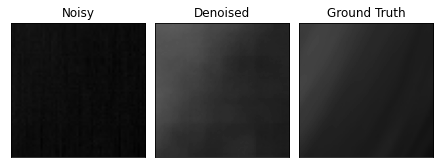

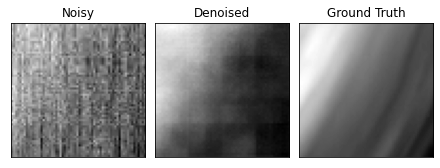

RMSE-NZ  Pred=0.0533  Noisy=0.1093 BEST
MAE-NZ   Pred=0.0483  Noisy=0.1013 BEST
PSNR     Pred=14.0 dB Noisy=7.7 dB BEST
Accuracy Pred=0.01    Noisy=0.00 BEST
SSM      Pred=0.92    Noisy=0.41
HOG MSE  Pred=0.24    Noisy=0.40
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_2_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_2_nitid_idx076.tif


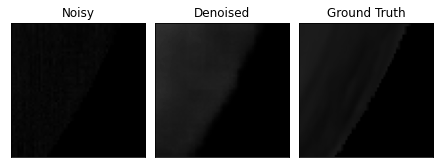

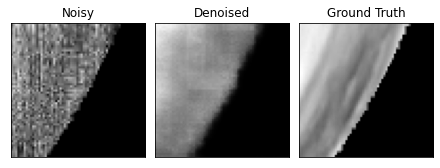

RMSE-NZ  Pred=0.0342  Noisy=0.0422 BEST
MAE-NZ   Pred=0.0245  Noisy=0.0346 BEST
PSNR     Pred=10.9 dB Noisy=9.1 dB BEST
Accuracy Pred=0.44    Noisy=0.23 BEST
SSM      Pred=0.86    Noisy=0.63
HOG MSE  Pred=0.10    Noisy=0.05
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_8_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_8_nitid_idx076.tif


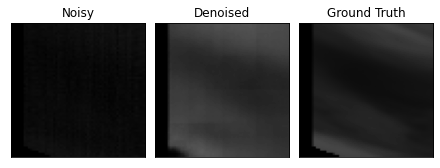

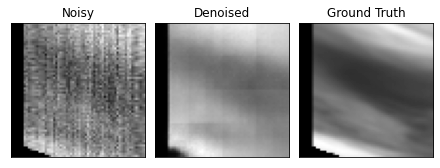

RMSE-NZ  Pred=0.0859  Noisy=0.0976 BEST
MAE-NZ   Pred=0.0789  Noisy=0.0842 BEST
PSNR     Pred=10.2 dB Noisy=9.1 dB BEST
Accuracy Pred=0.10    Noisy=0.00 BEST
SSM      Pred=0.77    Noisy=0.31
HOG MSE  Pred=0.09    Noisy=0.23
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0066_01_00_5_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0066_01_00_5_nitid_idx076.tif


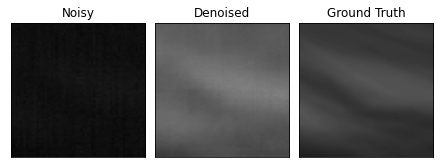

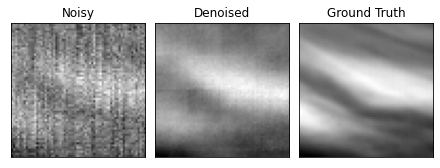

RMSE-NZ  Pred=0.1393  Noisy=0.1790 BEST
MAE-NZ   Pred=0.1380  Noisy=0.1749 BEST
PSNR     Pred=7.6 dB Noisy=5.4 dB BEST
Accuracy Pred=0.00    Noisy=0.00 WORST
SSM      Pred=0.85    Noisy=0.29
HOG MSE  Pred=0.12    Noisy=0.46
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0066_01_01_6_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0066_01_01_6_nitid_idx076.tif


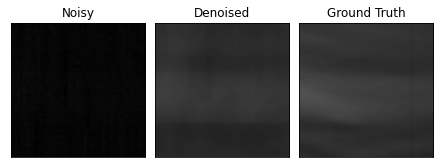

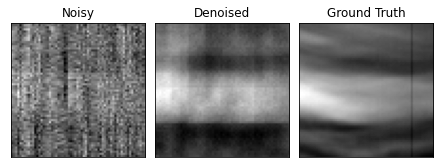

RMSE-NZ  Pred=0.0324  Noisy=0.1861 BEST
MAE-NZ   Pred=0.0282  Noisy=0.1834 BEST
PSNR     Pred=19.8 dB Noisy=4.6 dB BEST
Accuracy Pred=0.12    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.26
HOG MSE  Pred=0.16    Noisy=0.39
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_00_4_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_00_4_nitid_idx076.tif


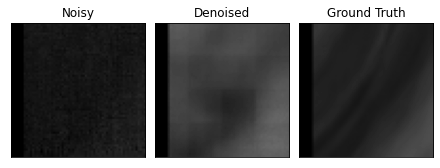

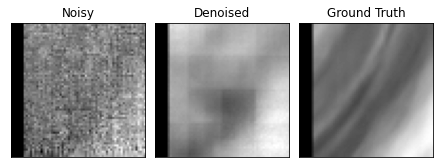

RMSE-NZ  Pred=0.1127  Noisy=0.0728 WORST
MAE-NZ   Pred=0.1027  Noisy=0.0602 WORST
PSNR     Pred=8.6 dB Noisy=12.4 dB WORST
Accuracy Pred=0.09    Noisy=0.04 BEST
SSM      Pred=0.74    Noisy=0.45
HOG MSE  Pred=0.11    Noisy=0.17
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_01_13_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_01_13_nitid_idx076.tif


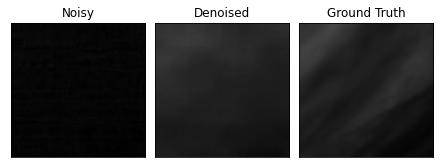

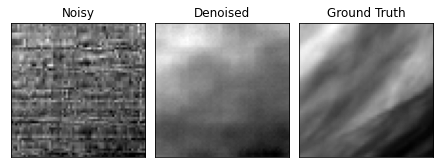

RMSE-NZ  Pred=0.0334  Noisy=0.1143 BEST
MAE-NZ   Pred=0.0276  Noisy=0.1044 BEST
PSNR     Pred=18.2 dB Noisy=7.5 dB BEST
Accuracy Pred=0.21    Noisy=0.00 BEST
SSM      Pred=0.86    Noisy=0.30
HOG MSE  Pred=0.18    Noisy=0.21
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_01_00_3_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_01_00_3_nitid_idx076.tif


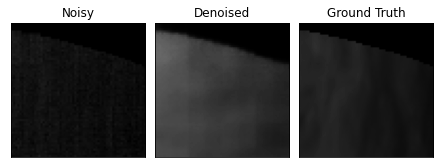

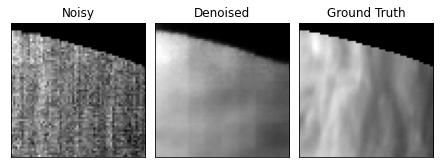

RMSE-NZ  Pred=0.1178  Noisy=0.0540 WORST
MAE-NZ   Pred=0.1021  Noisy=0.0470 WORST
PSNR     Pred=3.8 dB Noisy=10.6 dB WORST
Accuracy Pred=0.15    Noisy=0.08 BEST
SSM      Pred=0.67    Noisy=0.44
HOG MSE  Pred=0.07    Noisy=0.06
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0164_03_01_11_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0164_03_01_11_nitid_idx076.tif


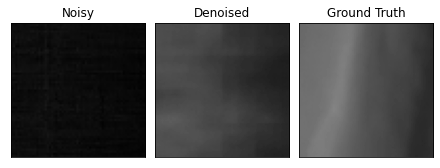

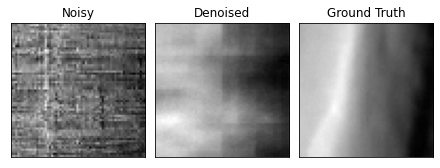

RMSE-NZ  Pred=0.1162  Noisy=0.3118 BEST
MAE-NZ   Pred=0.1039  Noisy=0.2974 BEST
PSNR     Pred=13.0 dB Noisy=4.4 dB BEST
Accuracy Pred=0.03    Noisy=0.00 BEST
SSM      Pred=0.82    Noisy=0.32
HOG MSE  Pred=0.25    Noisy=0.36
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0164_03_01_9_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0164_03_01_9_nitid_idx076.tif


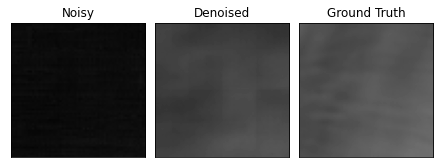

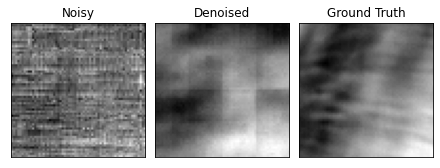

RMSE-NZ  Pred=0.0756  Noisy=0.2883 BEST
MAE-NZ   Pred=0.0717  Noisy=0.2864 BEST
PSNR     Pred=15.1 dB Noisy=3.5 dB BEST
Accuracy Pred=0.01    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.32
HOG MSE  Pred=0.06    Noisy=0.06
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0231_05_01_7_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0231_05_01_7_nitid_idx076.tif


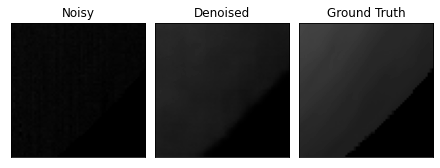

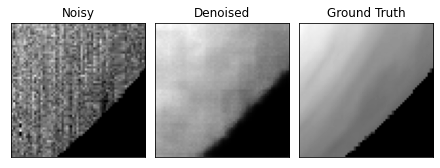

RMSE-NZ  Pred=0.0496  Noisy=0.1343 BEST
MAE-NZ   Pred=0.0418  Noisy=0.1226 BEST
PSNR     Pred=14.8 dB Noisy=6.2 dB BEST
Accuracy Pred=0.20    Noisy=0.11 BEST
SSM      Pred=0.89    Noisy=0.50
HOG MSE  Pred=0.09    Noisy=0.19
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0231_05_01_8_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0231_05_01_8_nitid_idx076.tif


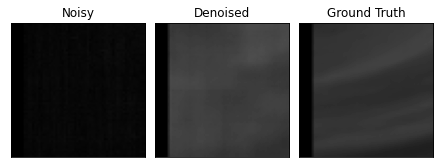

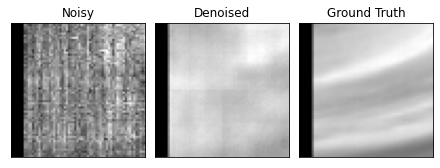

RMSE-NZ  Pred=0.0445  Noisy=0.1755 BEST
MAE-NZ   Pred=0.0390  Noisy=0.1729 BEST
PSNR     Pred=15.4 dB Noisy=3.5 dB BEST
Accuracy Pred=0.12    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.20
HOG MSE  Pred=0.10    Noisy=0.25
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0242_08_00_15_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0242_08_00_15_nitid_idx076.tif


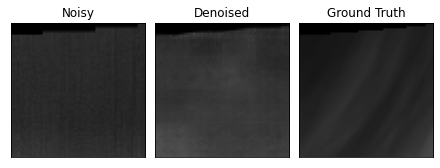

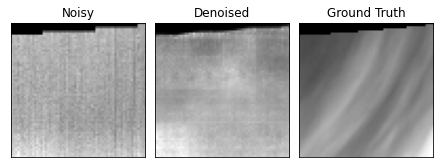

RMSE-NZ  Pred=0.0728  Noisy=0.0385 WORST
MAE-NZ   Pred=0.0656  Noisy=0.0294 WORST
PSNR     Pred=11.8 dB Noisy=17.3 dB WORST
Accuracy Pred=0.06    Noisy=0.25 WORST
SSM      Pred=0.76    Noisy=0.84
HOG MSE  Pred=0.11    Noisy=0.12
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0272_04_00_9_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0272_04_00_9_nitid_idx076.tif


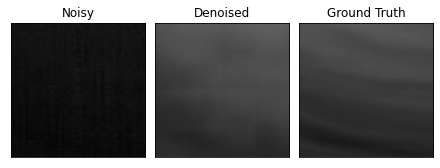

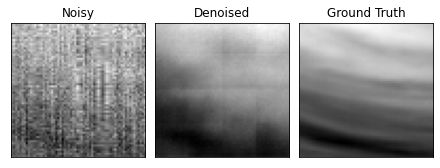

RMSE-NZ  Pred=0.0335  Noisy=0.1778 BEST
MAE-NZ   Pred=0.0278  Noisy=0.1697 BEST
PSNR     Pred=20.5 dB Noisy=6.0 dB BEST
Accuracy Pred=0.23    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.39
HOG MSE  Pred=0.20    Noisy=0.49
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0376_06_01_13_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0376_06_01_13_nitid_idx076.tif


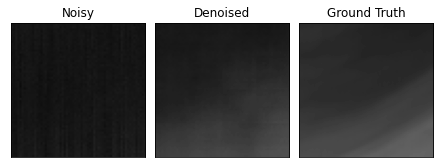

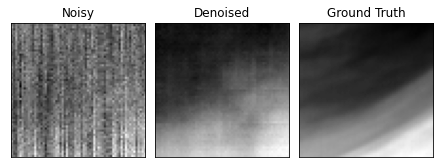

RMSE-NZ  Pred=0.0527  Noisy=0.1427 BEST
MAE-NZ   Pred=0.0476  Noisy=0.1285 BEST
PSNR     Pred=17.4 dB Noisy=8.8 dB BEST
Accuracy Pred=0.04    Noisy=0.00 BEST
SSM      Pred=0.90    Noisy=0.73
HOG MSE  Pred=0.14    Noisy=0.31
******************************************************


In [11]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
                dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
                dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )